In [240]:
# %pip install tslearn

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline
from tslearn.clustering import silhouette_score
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [242]:
# Define the root directory where you want to search for CSV files
root_directory = r'C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators'

# Use the glob library to recursively find CSV files

csv_files = glob.glob(root_directory + '/*.csv', recursive= True)

for i in csv_files:
    print(i)

C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Monthly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Quarterly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Yearly.csv


In [243]:
path_quarterly = csv_files[1]
df_quarterly = pd.read_csv(path_quarterly)

df_quarterly.drop(columns= ['Unnamed: 4'], inplace= True)
df_quarterly['PERIOD'] = pd.to_datetime(df_quarterly['PERIOD'])
df_quarterly.set_index(['PERIOD'], inplace= True)

df_quarterly.sort_index(ascending= True)

df_quarterly.head()

,ACTUAL_VALUE,INDICATOR_CODE,INDICATOR_NAME
PERIOD,,,
2000-03-31,26.7,SAFZAXX01Qa001,Unemployment Rate
2000-06-30,26.7,SAFZAXX01Qa001,Unemployment Rate
2000-09-30,23.3,SAFZAXX01Qa001,Unemployment Rate
2000-12-31,23.3,SAFZAXX01Qa001,Unemployment Rate
2001-03-31,24.6,SAFZAXX01Qa001,Unemployment Rate


In [244]:
df_quarterly = df_quarterly.pivot_table(index= df_quarterly.index, columns='INDICATOR_NAME', values='ACTUAL_VALUE')

In [245]:
# Original indicators present in quarterly df

len(df_quarterly.columns)

308

In [246]:
# Setting threshold at 55 % NaN (45% values)

cols = [col for col in df_quarterly.columns if (df_quarterly[col].isnull().sum() / len(df_quarterly) * 100) < 55]
len(cols)

90

In [247]:
df_quarterly = df_quarterly[cols]   

# Number of records after dropping the NaN values

df_quarterly.dropna(inplace= True)
print(len(df_quarterly))

106


In [248]:
df_quarterly.head(3)

INDICATOR_NAME,"Annualised GDP s.a. - Agriculture, Forestry and Fishing",Annualised GDP s.a. - Construction,"Annualised GDP s.a. - Electricity, Gas and Water","Annualised GDP s.a. - Finance, Real Estate and Business Services",Annualised GDP s.a. - General Government Services,Annualised GDP s.a. - Manufacturing,Annualised GDP s.a. - Mining and Quarrying,Annualised GDP s.a. - Personal Services,"Annualised GDP s.a. - Trade, Catering and Accommodation","Annualised GDP s.a. - Transport, Storage and Communication",...,Real GDP - Mining and Quarrying,Real GDP - Personal Sevices,"Real GDP - Transport, Storage and Communication","Real GDP - Wholesale and Retail Trade, Hotels and Restaurants",Real GDP Value Added at Basic Prices,Real GDP at Market Prices,Remuneration Per Worker Change - Private Sector (QoQ),Remuneration Per Worker Change - Public Sector (QoQ),Remuneration Per Worker Change - Total (QoQ),Total Assets of Short-Term Insurers
PERIOD,,,,,,,,,,,,,,,,,,,,,
1994-03-31,64026.620653,57342.366141,87523.336250,354152.560074,227628.430585,337649.493638,231749.140782,342888.272293,264449.365227,126106.484297,...,57172.719377,84734.885720,31295.810995,62265.132984,510613.532207,571211.440642,9.6,10.5,9.7,23161.0
1994-06-30,64285.022588,57751.530606,89086.502788,359991.380964,228597.901869,339889.100966,231938.641217,349376.731168,265495.709238,127244.410734,...,57598.249635,87266.832172,30704.915319,62755.609930,534134.220462,596439.624071,10.8,28.0,15.3,24107.0
1994-09-30,65254.419647,58426.977602,89584.140443,364604.665397,229647.447559,345744.630827,231706.983098,355656.745711,267528.277481,129533.640280,...,58578.505551,89670.909748,33055.844116,66206.223103,543091.447336,606374.562406,12.8,22.5,15.4,24472.0


In [249]:
df_quarterly.to_csv('data_used.csv')

## Pre-processing

In [250]:
X = df_quarterly.drop(columns= ['Real GDP at Market Prices'])
y = df_quarterly['Real GDP at Market Prices']

X_train, y_train = X[:-16], y[:-16]
X_test, y_test = X[-16:], y[-16:]

In [251]:
# Transposing it in order to get the data in required shape

X_train, y_train = X_train.T, y_train.T
X_test, y_test = X_test.T, y_test.T

In [252]:
X_test.head(3)

PERIOD,2016-09-30,2016-12-31,2017-03-31,2017-06-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
INDICATOR_NAME,,,,,,,,,,,,,,,,
"Annualised GDP s.a. - Agriculture, Forestry and Fishing",83093.954710,102913.594477,107551.516666,122298.173607,104538.466262,108413.042760,109434.762469,122049.648286,108374.658996,95899.865336,103594.713800,109771.507763,110099.737133,121570.168547,117002.325211,117565.849756
Annualised GDP s.a. - Construction,155953.808621,153944.994211,150269.334042,147388.015529,144649.494567,144450.672261,144868.605355,145482.628881,145325.141303,142997.105821,141254.732243,138844.683500,137548.583950,134012.421865,97278.721657,111582.859101
"Annualised GDP s.a. - Electricity, Gas and Water",110079.097166,108494.673442,109714.778084,110598.531439,110840.555407,111434.866344,110889.080397,111438.478335,111299.469695,109215.906563,108543.077084,107008.011216,105530.998966,104847.955803,92073.966405,103739.316456


In [253]:
sc_dtw = TimeSeriesScalerMeanVariance()

X_train_scaled = sc_dtw.fit_transform(X_train)
# X_test_scaled = sc_dtw.transform(X_test)

In [254]:
X_train_scaled.shape

(89, 90, 1)

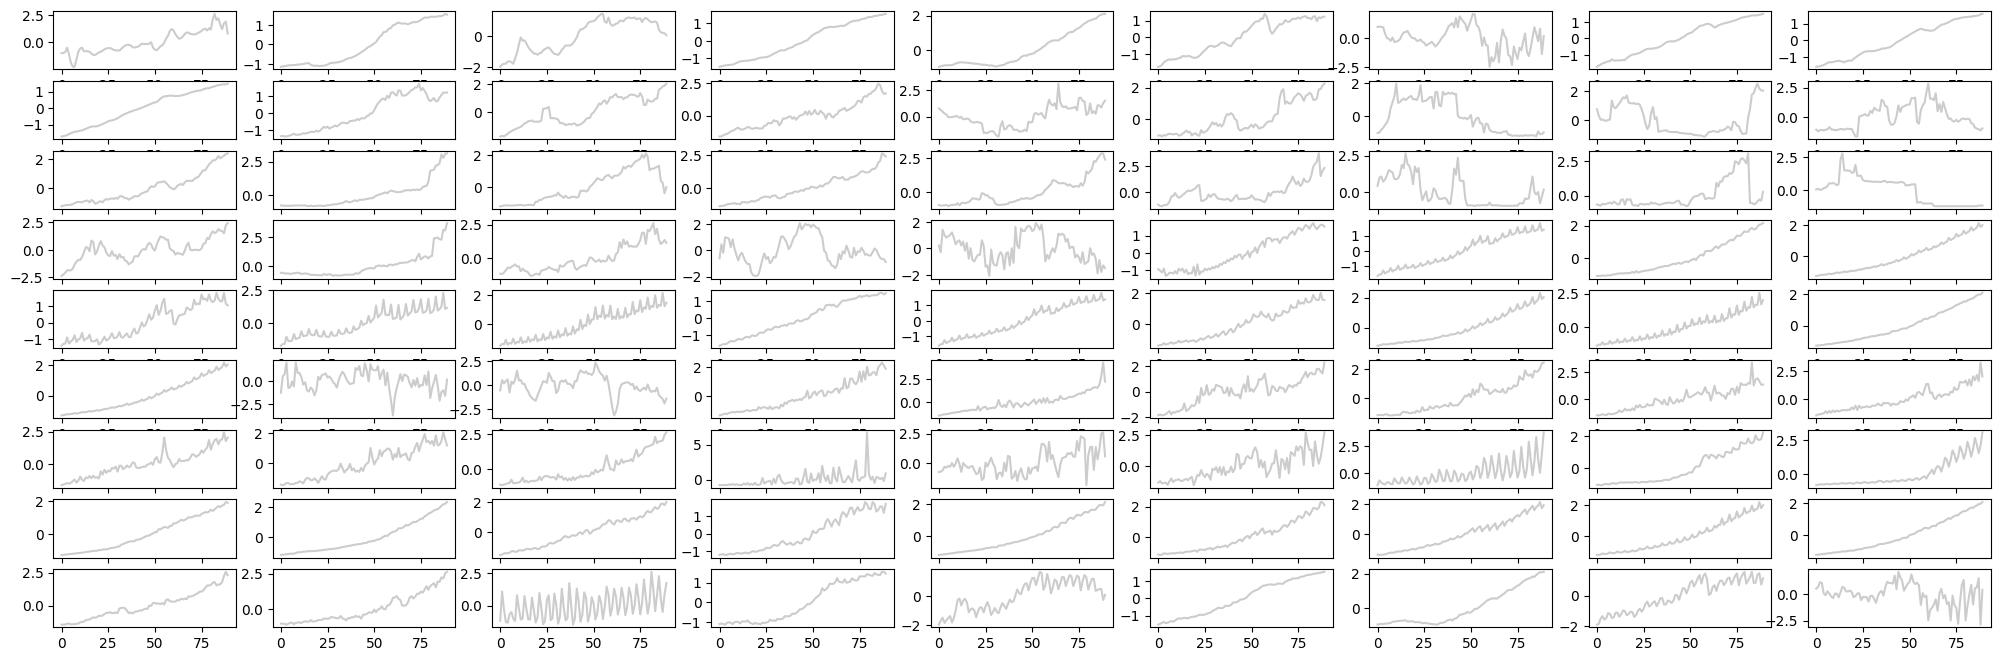

In [255]:
for i in range(81):
    plt.subplot(9, 9, i + 1)
    plt.plot(X_train_scaled[i].ravel(), "k-", alpha=.2)

In [256]:
inertia = []
K = range(1,8)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)
    
    km = km.fit(X_train_scaled)
    inertia.append(km.inertia_)

In [257]:
for i in zip(K, inertia):
    print(i)

(1, 14.951594543318517)
(2, 8.854986814269704)
(3, 7.727107096077142)
(4, 7.390327459890777)
(5, 6.9203014095184106)
(6, 6.198678234271814)
(7, 5.460006853792844)


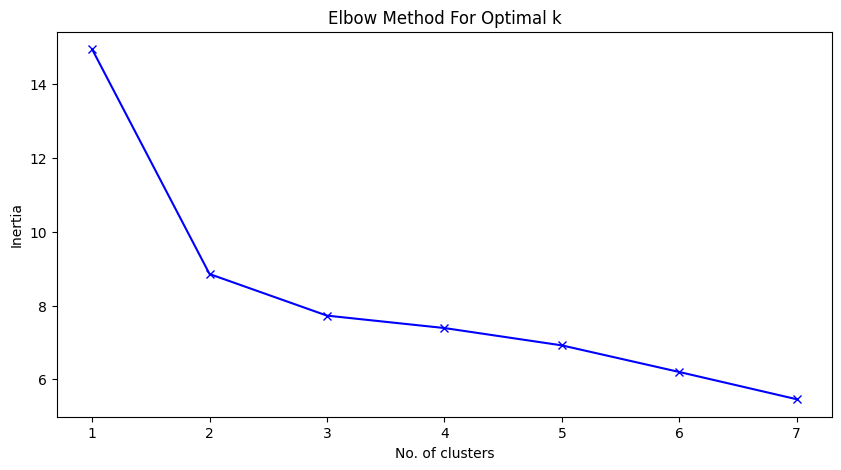

In [258]:
plt.figure(figsize= (10,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [259]:
from sklearn.cluster import KMeans
from tslearn.clustering import silhouette_score
import numpy as np

# Sample data (replace with your own data)
data = X_train_scaled

# Specify a range of cluster numbers to try
cluster_range = range(2, 16)

best_score = -1  # Initialize with a low value
best_num_clusters = None

for num_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=num_clusters, random_state=0, metric= 'dtw')
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate the silhouette score for this clustering
    score = silhouette_score(data, cluster_labels)
    
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {score}")
    
    # Update the best number of clusters if the score is higher
    if score > best_score:
        best_score = score
        best_num_clusters = num_clusters

print(f"Best number of clusters: {best_num_clusters}, Best Silhouette Score: {best_score}")


Number of clusters: 2, Silhouette Score: 0.6469978967288663
Number of clusters: 3, Silhouette Score: 0.38716982098552494
Number of clusters: 4, Silhouette Score: 0.3265783664720661
Number of clusters: 5, Silhouette Score: 0.3054085690955236
Number of clusters: 6, Silhouette Score: 0.3288502888959101
Number of clusters: 7, Silhouette Score: 0.29365182232500653
Number of clusters: 8, Silhouette Score: 0.27319227857972744
Number of clusters: 9, Silhouette Score: 0.28189849128062666
Number of clusters: 10, Silhouette Score: 0.26836233416006827
Number of clusters: 11, Silhouette Score: 0.2660274397264424
Number of clusters: 12, Silhouette Score: 0.26935623469827685
Number of clusters: 13, Silhouette Score: 0.2606358792727189
Number of clusters: 14, Silhouette Score: 0.25690058592159837
Number of clusters: 15, Silhouette Score: 0.23812781823289061
Best number of clusters: 2, Best Silhouette Score: 0.6469978967288663


c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.71
For n_clusters = 3 The average silhouette_score is : 0.67


c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.10
For n_clusters = 5 The average silhouette_score is : 0.09


c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


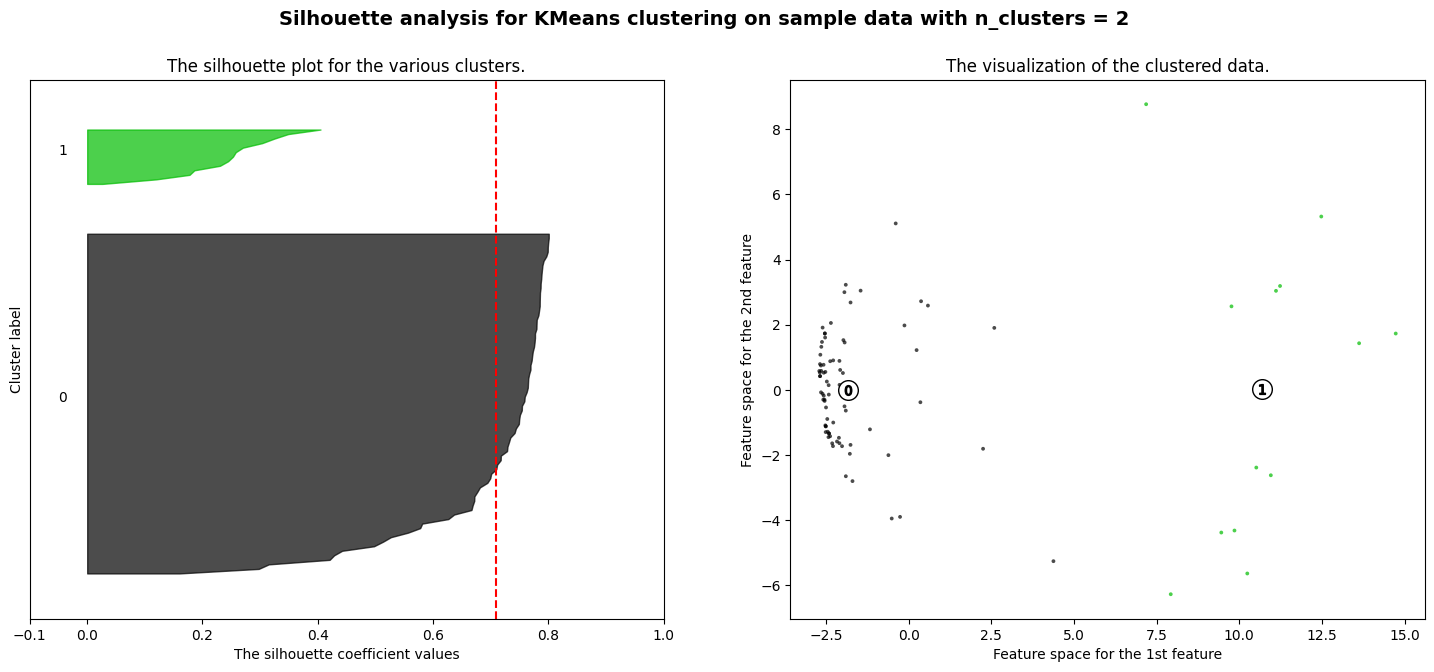

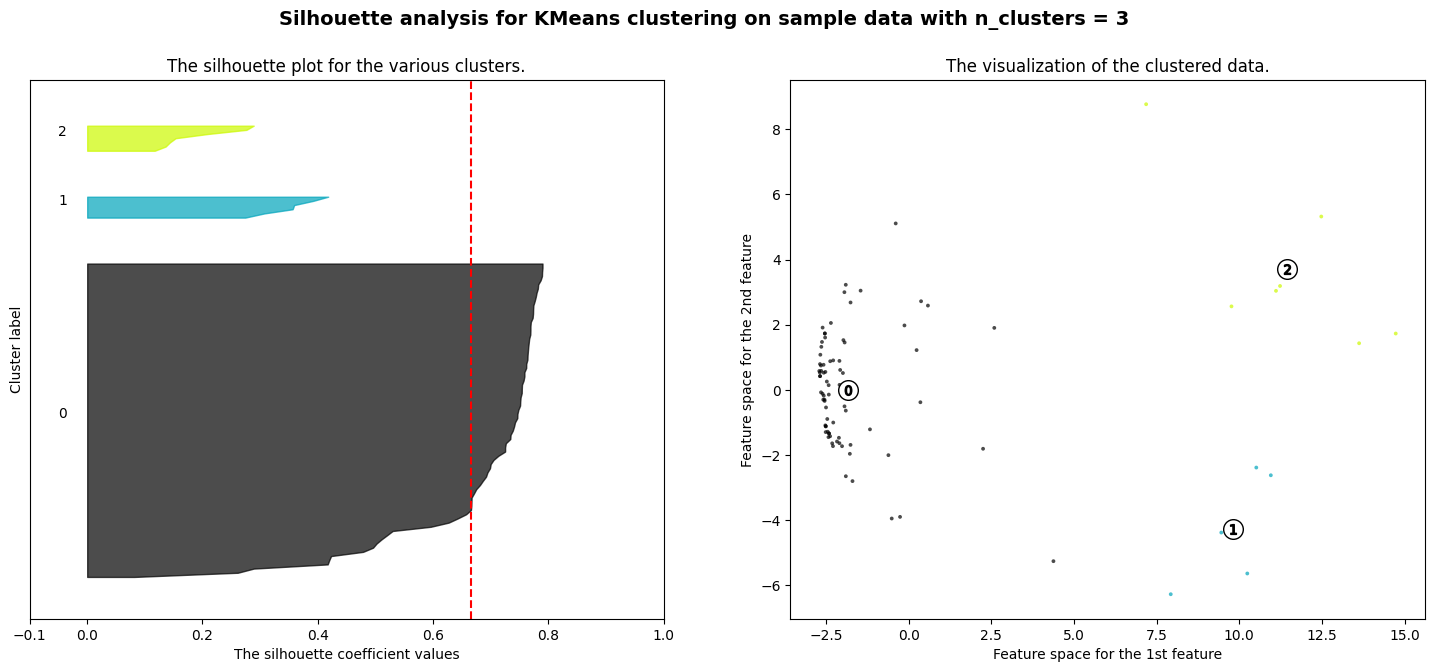

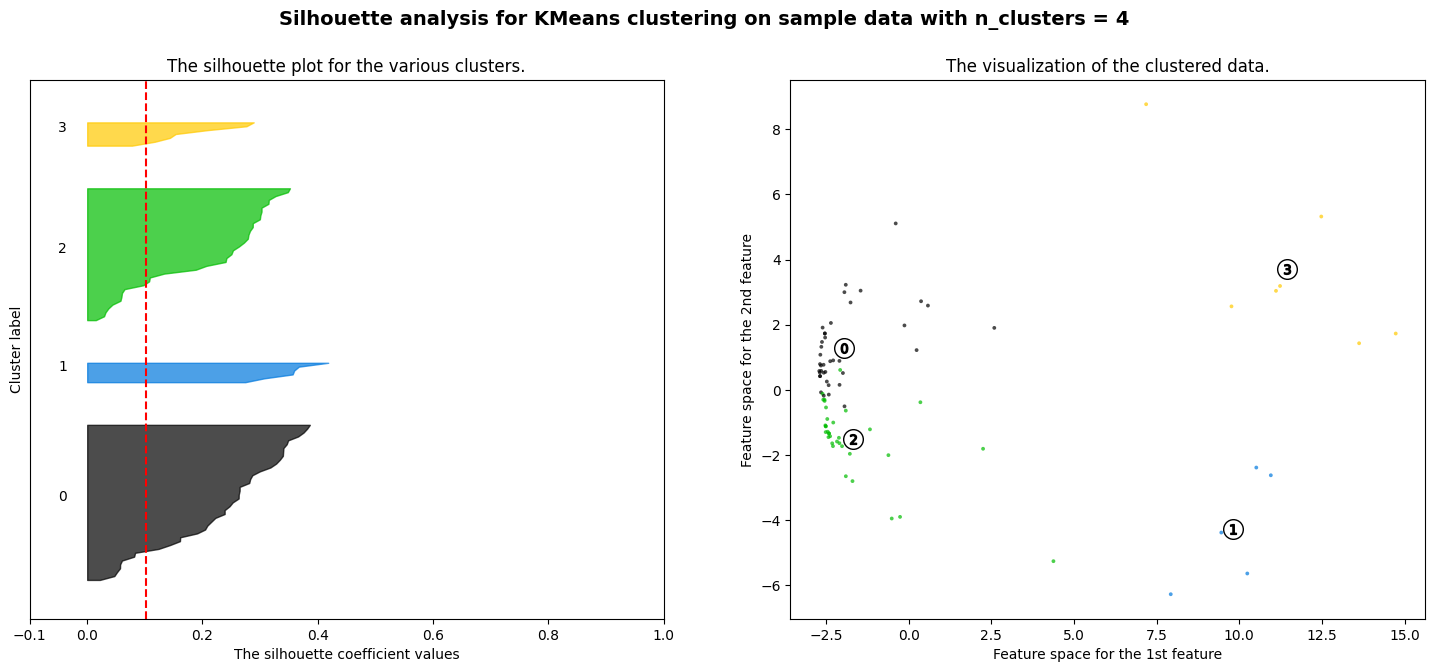

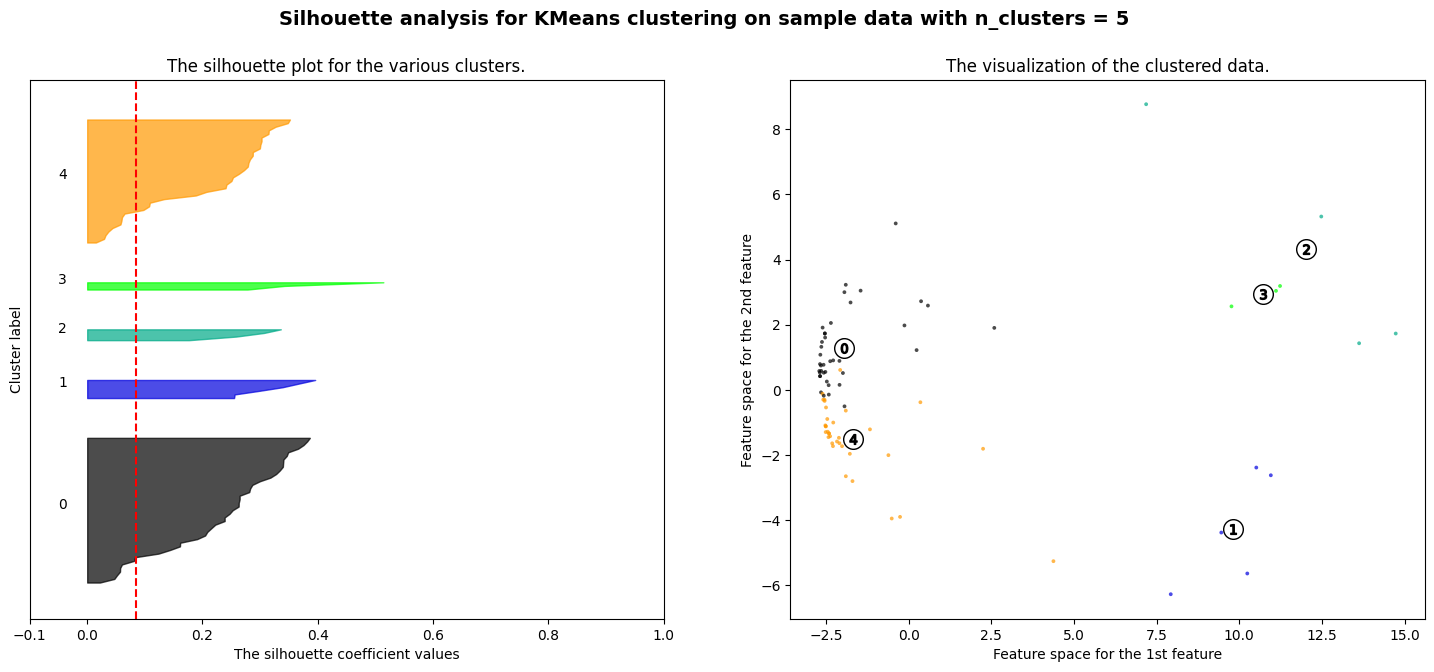

In [260]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


train_pca = list(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1]))
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_pca)

X = train_pca

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is : {:.2f}"
        .format(silhouette_avg),
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [261]:
cluster_centers.shape

(4, 90)

In [262]:
# n_clusters = 3
# sz = X_train_scaled.shape[1]
# seed = 0

# ## Actual clusters(using labels) plot
# plt.figure()
# for yi in range(n_clusters):
#     plt.subplot(3, n_clusters, yi + 1)
#     for xx in X_train_scaled[y_train.T == yi+1]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
#              transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("Acutal")

In [263]:
X_train_scaled[0].shape, y_train.shape

((90, 1), (90,))

DBA k-means
DBA silhoutte: 0.65


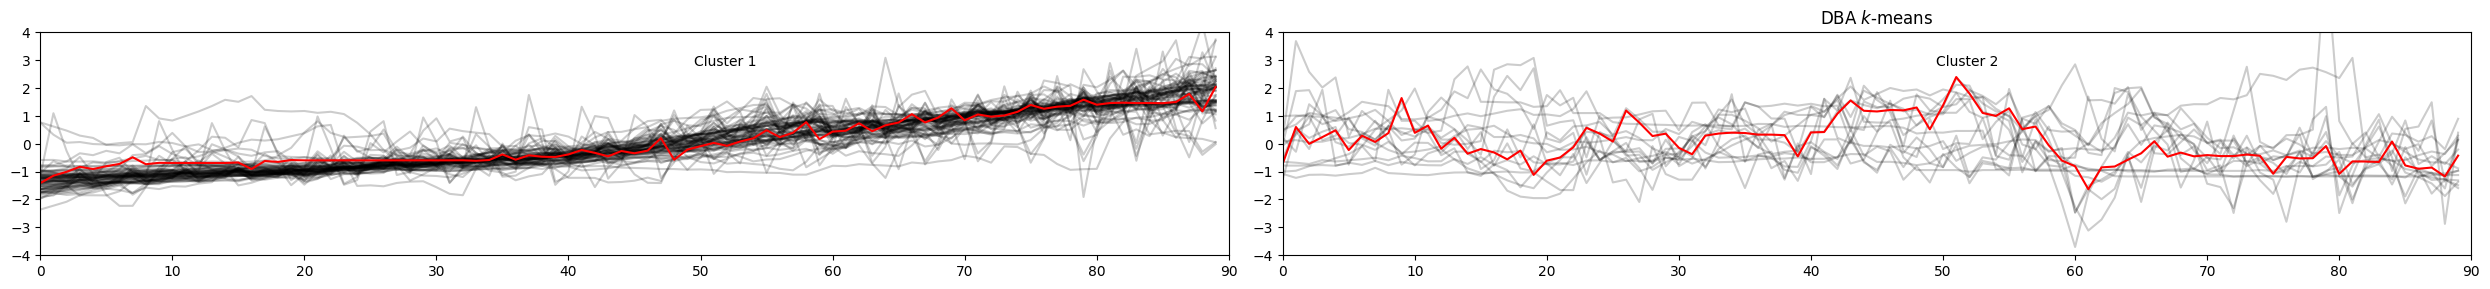

In [264]:
# DBA-k-means
print("DBA k-means")
n_clusters = 2
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred_dba_km = dba_km.fit_predict(X_train_scaled)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X_train_scaled, y_pred_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(3, 2, yi+1)
    for xx in X_train_scaled[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
        


plt.tight_layout()
plt.show()

In [265]:
for i in zip(X_train.index, y_pred_dba_km):
    print(i)

('Annualised GDP s.a. - Agriculture, Forestry and Fishing', 0)
('Annualised GDP s.a. - Construction', 0)
('Annualised GDP s.a. - Electricity, Gas and Water', 0)
('Annualised GDP s.a. - Finance, Real Estate and Business Services', 0)
('Annualised GDP s.a. - General Government Services', 0)
('Annualised GDP s.a. - Manufacturing', 0)
('Annualised GDP s.a. - Mining and Quarrying', 1)
('Annualised GDP s.a. - Personal Services', 0)
('Annualised GDP s.a. - Trade, Catering and Accommodation', 0)
('Annualised GDP s.a. - Transport, Storage and Communication', 0)
('Assets of Long-Term Insurers: Coin, Banknotes and Deposits', 0)
('Assets of Long-Term Insurers: Fixed Property', 0)
('Assets of Long-Term Insurers: Fixed-Interest Securities - Government', 0)
('Assets of Long-Term Insurers: Fixed-Interest Securities - Local Governments', 0)
('Assets of Long-Term Insurers: Fixed-Interest Securities - Public Enterprises', 0)
('Assets of Long-Term Insurers: Loans against Policies', 1)
('Assets of Long-Ter

In [266]:
# X_test = sc_dtw.fit_transform(X_test)

In [267]:
d = {key:val for key,val in zip(X_train.index, y_pred_dba_km)}
d

{'Annualised GDP s.a. - Agriculture, Forestry and Fishing': 0,
 'Annualised GDP s.a. - Construction': 0,
 'Annualised GDP s.a. - Electricity, Gas and Water': 0,
 'Annualised GDP s.a. - Finance, Real Estate and Business Services': 0,
 'Annualised GDP s.a. - General Government Services': 0,
 'Annualised GDP s.a. - Manufacturing': 0,
 'Annualised GDP s.a. - Mining and Quarrying': 1,
 'Annualised GDP s.a. - Personal Services': 0,
 'Annualised GDP s.a. - Trade, Catering and Accommodation': 0,
 'Annualised GDP s.a. - Transport, Storage and Communication': 0,
 'Assets of Long-Term Insurers: Coin, Banknotes and Deposits': 0,
 'Assets of Long-Term Insurers: Fixed Property': 0,
 'Assets of Long-Term Insurers: Fixed-Interest Securities - Government': 0,
 'Assets of Long-Term Insurers: Fixed-Interest Securities - Local Governments': 0,
 'Assets of Long-Term Insurers: Fixed-Interest Securities - Public Enterprises': 0,
 'Assets of Long-Term Insurers: Loans against Policies': 1,
 'Assets of Long-Ter

In [268]:
df_cluster = pd.DataFrame(d, index= [0])
# df_cluster

df_cluster = df_cluster.T
df_cluster


,0
"Annualised GDP s.a. - Agriculture, Forestry and Fishing",0
Annualised GDP s.a. - Construction,0
"Annualised GDP s.a. - Electricity, Gas and Water",0
"Annualised GDP s.a. - Finance, Real Estate and Business Services",0
Annualised GDP s.a. - General Government Services,0
Annualised GDP s.a. - Manufacturing,0
Annualised GDP s.a. - Mining and Quarrying,1
Annualised GDP s.a. - Personal Services,0
"Annualised GDP s.a. - Trade, Catering and Accommodation",0
"Annualised GDP s.a. - Transport, Storage and Communication",0


In [269]:
df_cluster.to_csv('cluster_2.csv')

In [270]:
asdgwd 

NameError: name 'asdgwd' is not defined

## Test

DBA k-means
DBA silhoutte: 0.35


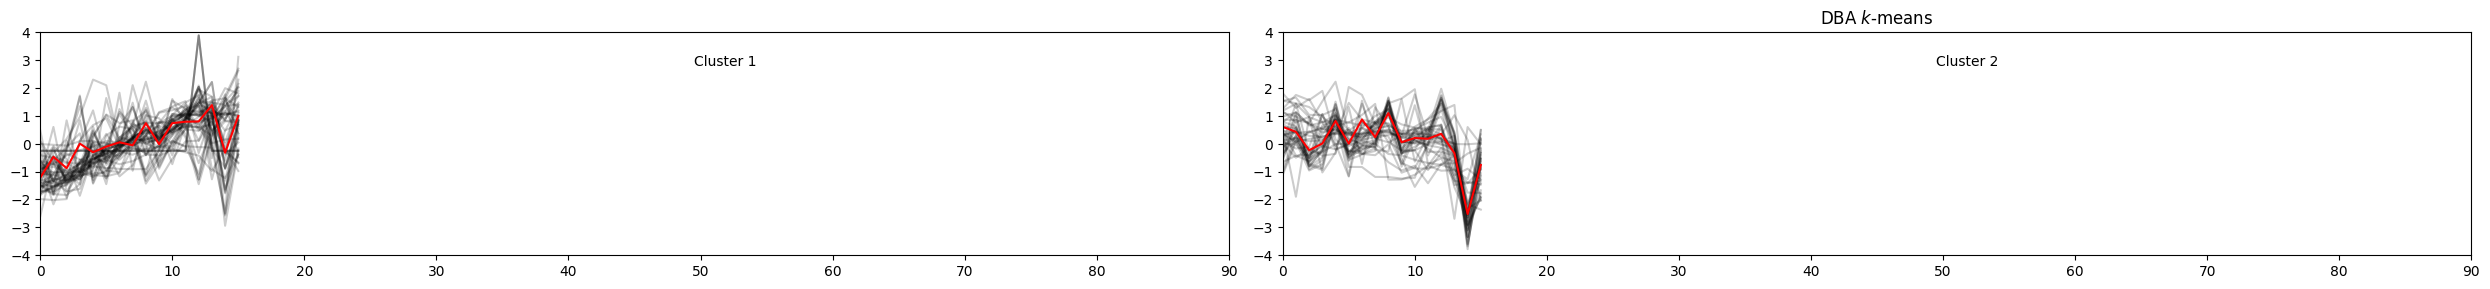

In [ ]:
# DBA-k-means
print("DBA k-means")
n_clusters = 2
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred_dba_km = dba_km.fit_predict(X_test)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X_test, y_pred_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(3, 2, yi+1)
    for xx in X_test[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
        


plt.tight_layout()
plt.show()